In [1]:
!pip install xgboost

In [2]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.8 MB/s eta 0:00:00


In [3]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [4]:
%matplotlib inline
import time
import re

#data import libraries
import pandas as pd

#path libraries
from pathlib import Path
import os.path as osp

#math libraries
import math
import numpy as np
import scipy as sp
import scipy.stats as stats
from scipy.stats import norm

#plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


#sklearn libraries for data cleaning
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.preprocessing import StandardScaler #normalize your dataset
from sklearn.model_selection import train_test_split #split data to train and test data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler #normalize your dataset
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#sklearn library for linear regression
from sklearn.linear_model import LinearRegression

#sklearn libraries for regularized regression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

#sklearn library for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import BayesianRidge

#sklearn library for knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#sklearn libraries for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import _tree
from sklearn.tree import plot_tree

#sklearn libraries for data cleaning and cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler #normalize your dataset

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


#sklearn library for naive bayes
from sklearn.naive_bayes import GaussianNB

#sklearn library for support vector machine
from sklearn.svm import SVC

#sklearn library for neural networks
from sklearn.neural_network import MLPClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#LGBM
from lightgbm import LGBMClassifier

from xgboost import XGBClassifier

#optuna
import optuna
from optuna.samplers import TPESampler

#sklearn library for scores and errors
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import cohen_kappa_score, log_loss
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score


#feature selection
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFECV, RFE

#imbalanced smotes
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler

#warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import category_encoders as ce

In [66]:
vaccine_features = pd.read_csv("training_set_features.csv")

In [67]:
vaccine_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [68]:
vaccine_features.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [69]:
vaccine_features.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [70]:
vaccine_labels = pd.read_csv("training_set_labels.csv")

In [71]:
vaccine_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [72]:
vaccine_labels.describe()

,respondent_id,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000
mean,13353.000000,0.212454,0.465608
std,7709.791156,0.409052,0.498825
min,0.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000
75%,20029.500000,0.000000,1.000000
max,26706.000000,1.000000,1.000000


In [73]:
vaccine_labels.dtypes

respondent_id       int64
h1n1_vaccine        int64
seasonal_vaccine    int64
dtype: object

In [74]:
vaccine = pd.merge(vaccine_features, vaccine_labels, on="respondent_id")

In [75]:
vaccine.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [76]:
vaccine.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [77]:
vaccine.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [17]:
# this is the function that plots the custom confusion matrix with the colors and labels
def confusion_matrix_plotting(cm, title):
    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 25},
            cmap=sns.color_palette(['tomato', 'palegreen']), cbar=False,
            yticklabels=['Vaccinated', 'Not Vaccinated'], xticklabels=['Vaccinated', 'Not Vaccinated'], ax=ax)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(labelsize=14, length=0)

    ax.set_title(title, size=18, pad=10)
    ax.set_xlabel('Predicted', size=14)
    ax.set_ylabel('Actual', size=14)

    additional_texts = ['(True Positive)', '(False Negative)', '(False Positive)', '(True Negative)']
    for text_elt, additional_text in zip(ax.texts, additional_texts):
        ax.text(*text_elt.get_position(), '\n' + additional_text, color=text_elt.get_color(),
            ha='center', va='top', size=12)
    plt.tight_layout()
    plt.show()

In [18]:
def plot_roc_curve(test, prediction):
    plt.figure(figsize=(7,7))
    fpr1, tpr1, threshold1 = roc_curve(test, prediction)
    roc_auc = metrics.auc(fpr1, tpr1)
    display = RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc,estimator_name='example estimator')
    display.plot()
    plt.show()

In [19]:
# Helper function
def quick_evaluate_with_dt(X_train, X_test, y_train, y_test, name, balance_weights=False):

    cw = None
    if balance_weights == True:
        cw = 'balanced'

    clf = DecisionTreeClassifier(random_state=0, class_weight=cw)
    clf = RandomForestClassifier(random_state=0, n_estimators=100, class_weight=cw)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy       = accuracy_score(y_test, y_pred)
    f1             = f1_score(y_test, y_pred)
    recall         = tn/(tn+fp)
    precision      = precision_score(y_test, y_pred)
    roc_auc        = roc_auc_score(y_test, y_pred)

    df = pd.DataFrame({"Method"    : [name],
                       "Neg"       : [tn + fn],
                       "True Neg"  : [tn],
                       "False Neg" : [fn],
                       "Pos"       : [tp + fp],
                       "TP"        : [tp],
                       "FP"        : [fp],
                       "Accuracy"  : [accuracy],
                       "Recall"    : [recall],
                       "Precision" : [precision],
                       "F1"        : [f1],
                       "AUC"       : [roc_auc],
                      })

    print(df)
    return df

In [78]:
X_seasonal = vaccine.drop(columns=['h1n1_vaccine', 'seasonal_vaccine', 'respondent_id'], axis=1)
y_seasonal = vaccine['seasonal_vaccine']
X_seasonal_train, X_seasonal_test, y_seasonal_train, y_seasonal_test = train_test_split(X_seasonal, y_seasonal, test_size=0.2, stratify=y_seasonal, random_state=0)

In [79]:
X_h1n1 = vaccine.drop(columns=['h1n1_vaccine', 'seasonal_vaccine', 'respondent_id'], axis=1)
y_h1n1 = vaccine['h1n1_vaccine']
X_h1n1_train, X_h1n1_test, y_h1n1_train, y_h1n1_test = train_test_split(X_h1n1, y_h1n1, test_size=0.2, stratify=y_h1n1, random_state=0)

In [22]:
# list of numeric features
numeric_features = ['h1n1_concern', 'h1n1_knowledge',  'behavioral_face_mask',
            'behavioral_wash_hands', 'behavioral_large_gatherings',
                     'behavioral_touch_face',
            'doctor_recc_h1n1', 'chronic_med_condition',
                    'child_under_6_months', 'health_worker',
            'health_insurance', 'opinion_h1n1_vacc_effective',
                    'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc','doctor_recc_seasonal',
                 'opinion_seas_vacc_effective','opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
             'household_children', 'behavioral_outside_home', 'behavioral_antiviral_meds',
                    'behavioral_avoidance'
                    ]

# list of categorical features
categorical_features = ['hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation',
                        'marital_status', 'race', 'sex', 'rent_or_own']

ordinal_features = ['age_group', 'education', 'income_poverty', 'employment_status']

# here we do the data cleaning for the numerical features, fill in missing values using the mean and the scaling the data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))])

# here we do the data cleaning for the categorical features, fill in missing values using the most frequent
# then use one hot encoder to create dummy variables and just ignore unknown variables
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

ordinal_transformer = Pipeline(steps=[
    ('missing', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder())])

In [23]:
preprocessor_seasonal = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features),
            ('ord', ordinal_transformer, ordinal_features)],
            remainder = 'passthrough',
            sparse_threshold=0)

preprocessor_h1n1 = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features),
            ('ord', ordinal_transformer, ordinal_features)],
            remainder = 'passthrough',
            sparse_threshold=0)

In [24]:
a = X_seasonal_train
b = y_seasonal_train

# transform the train by using the data cleaning stuff above to fill in missing data and create dummy variables
processed_data = preprocessor_seasonal.fit_transform(a, b)

# Get the feature names for the transformed data
feature_names = preprocessor_seasonal.named_transformers_['cat']\
                    .named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numeric feature names with categorical feature names
all_feature_names = numeric_features + list(feature_names) + ordinal_features

# Convert the processed data array back into a DataFrame
X_seasonal_train = pd.DataFrame(processed_data, columns=all_feature_names)

X_seasonal_train["seasonal_vaccine_effectiveness"] = X_seasonal_train["opinion_seas_vacc_effective"]*X_seasonal_train["opinion_seas_sick_from_vacc"]
X_seasonal_train["seasonal_household"]=X_seasonal_train["household_children"]*X_seasonal_train["household_adults"]

X_seasonal_train = X_seasonal_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

X_seasonal_train = X_seasonal_train.loc[:,~X_seasonal_train.columns.duplicated()].copy()

X_seasonal_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,sex_Male,rent_or_own_Own,rent_or_own_Rent,rent_or_own_nan,age_group,education,income_poverty,employment_status,seasonal_vaccine_effectiveness,seasonal_household
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5.0,4.0,4.0,5.0,4.0,1.0,1.0,2.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,5.0,1.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,2.0,5.0,4.0,1.0,1.0,2.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,4.0,2.0,4.0,2.0,2.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5.0,4.0,1.0,5.0,5.0,1.0,1.0,1.0,0.0,0.0


In [25]:
# calculation of probability of studies being late
y_seasonal_train.value_counts()

0    11417
1     9948
Name: seasonal_vaccine, dtype: int64

In [84]:
a = X_h1n1_train
b = y_h1n1_train

# transform the train by using the data cleaning stuff above to fill in missing data and create dummy variables
processed_data = preprocessor_h1n1.fit_transform(a, b)

# Get the feature names for the transformed data
feature_names = preprocessor_h1n1.named_transformers_['cat']\
                    .named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numeric feature names with categorical feature names
all_feature_names = numeric_features + list(feature_names) + ordinal_features

# Convert the processed data array back into a DataFrame
X_h1n1_train = pd.DataFrame(processed_data, columns=all_feature_names)

X_h1n1_train["h1n1_flu"] = X_h1n1_train["h1n1_concern"]*X_h1n1_train["h1n1_knowledge"]
X_h1n1_train["h1n1_vaccine_effectiveness"] = X_h1n1_train["opinion_h1n1_vacc_effective"]*X_h1n1_train["opinion_h1n1_sick_from_vacc"]
X_h1n1_train["h1n1_chronic"] = X_h1n1_train["chronic_med_condition"]*X_h1n1_train["doctor_recc_h1n1"]

X_h1n1_train = X_h1n1_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

X_h1n1_train = X_h1n1_train.loc[:,~X_h1n1_train.columns.duplicated()].copy()

X_h1n1_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,rent_or_own_Own,rent_or_own_Rent,rent_or_own_nan,age_group,education,income_poverty,employment_status,h1n1_flu,h1n1_vaccine_effectiveness,h1n1_chronic
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.0,2.0,3.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,4.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,1.0,5.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.0,4.0,5.0,5.0,1.0,3.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,1.0,4.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0


In [85]:
y_h1n1_train.value_counts()

0    16826
1     4539
Name: h1n1_vaccine, dtype: int64

In [28]:
#XGBoost

In [29]:
def objective(trial, F, t):
    param_grid = {
        'device': 'cuda',
        'verbosity': 0,
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=25),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.15, step=0.001),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "alpha": trial.suggest_float("alpha", 0.01, 10, step=0.01),
        "lambda": trial.suggest_float("lambda", 1, 100, step=1),
        "subsample": trial.suggest_float("subsample", 0.5, 1, step=0.01),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1, step=0.01),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1, 10)
    }

    cv = StratifiedKFold(n_splits=10)
    cv_scores = np.empty(10)
    for idx, (train_idx, test_idx) in enumerate(cv.split(F, t)):
        X_train_f, X_test_f = F.iloc[train_idx], F.iloc[test_idx]
        y_train_f, y_test_f = t[train_idx], t[test_idx]

        model = XGBClassifier(random_state=42, n_jobs=-1 , **param_grid)

        model.fit(
            X_train_f,
            y_train_f,
            verbose=False,
            eval_set=[(X_test_f, y_test_f)],
            eval_metric='auc',
            early_stopping_rounds=100
             )
        preds = model.predict_proba(X_test_f)[:,1]

        cv_scores[idx] = roc_auc_score(y_test_f, preds)

    return np.mean(cv_scores)

In [30]:
sampler = TPESampler(n_startup_trials=10)

In [ ]:
X_seasonal_train.reset_index(drop=True, inplace=True)
y_seasonal_train.reset_index(drop=True, inplace=True)

study_seasonal = optuna.create_study(direction='maximize', sampler=sampler, study_name="XGB Classifier")
func = lambda trial: objective(trial, X_seasonal_train, y_seasonal_train)
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_seasonal.optimize(func, n_trials=1000, n_jobs=-1, show_progress_bar=True)

[I 2024-01-11 14:55:10,664] A new study created in memory with name: XGB Classifier


  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
print('Best hyperparameters:', study_seasonal.best_params)
print('Best Score:', study_seasonal.best_value)

Best hyperparameters: {'n_estimators': 450, 'learning_rate': 0.075, 'max_depth': 4, 'alpha': 2.07, 'lambda': 27.0, 'subsample': 0.81, 'colsample_bytree': 0.54, 'min_child_weight': 2, 'scale_pos_weight': 1.798828798128564}
Best Score: 0.8650046395151669


In [31]:
X_h1n1_train.reset_index(drop=True, inplace=True)
y_h1n1_train.reset_index(drop=True, inplace=True)

study_h1n1 = optuna.create_study(direction='maximize', sampler=sampler, study_name="XGB Classifier")
func = lambda trial: objective(trial, X_h1n1_train, y_h1n1_train)
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_h1n1.optimize(func, n_trials=1000, n_jobs=-1, show_progress_bar=True)

[I 2024-01-12 14:16:12,418] A new study created in memory with name: XGB Classifier


  0%|          | 0/1000 [00:00<?, ?it/s]

In [32]:
print('Best hyperparameters:', study_h1n1.best_params)
print('Best Score:', study_h1n1.best_value)

Best hyperparameters: {'n_estimators': 700, 'learning_rate': 0.051000000000000004, 'max_depth': 5, 'alpha': 6.84, 'lambda': 12.0, 'subsample': 0.9299999999999999, 'colsample_bytree': 0.52, 'min_child_weight': 6, 'scale_pos_weight': 1.8772978213375768}
Best Score: 0.8739839235034779


In [36]:
#study_seasonal best params
best_params = {'n_estimators': 450, 'learning_rate': 0.075, 'max_depth': 4, 'alpha': 2.07, 'lambda': 27.0, 'subsample': 0.81, 'colsample_bytree': 0.54, 'min_child_weight': 2, 'scale_pos_weight': 1.798828798128564}

In [37]:
clf_seasonal = XGBClassifier(**best_params, n_jobs=-1, random_state=42, verbose=0)

0.8570064658282559
0.8709145585481022
0.8661065254167173
0.8574973326594788
0.8702378055017654
0.8513630803388343
0.8714493118162843
0.8549939937817976
0.87208993545891
0.872532281659235


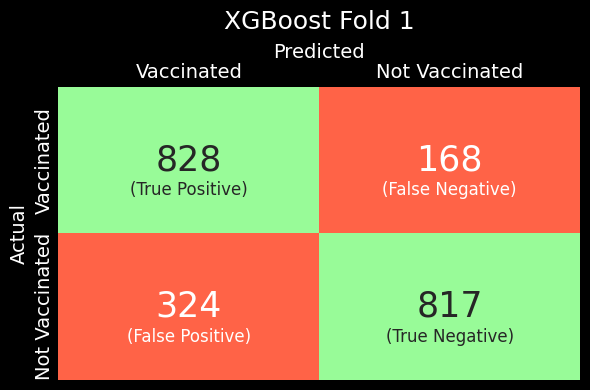



Classification Report:


              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1141
           1       0.72      0.83      0.77       996

    accuracy                           0.77      2137
   macro avg       0.77      0.77      0.77      2137
weighted avg       0.78      0.77      0.77      2137



Sensitivity: 0.8313
Specificity: 0.716
Log Loss: 8.298304851401797




<Figure size 700x700 with 0 Axes>

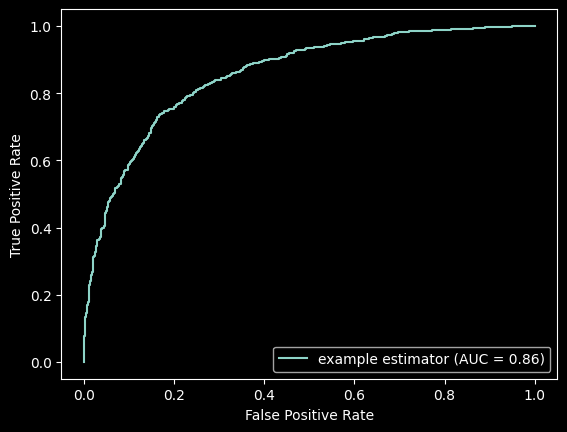

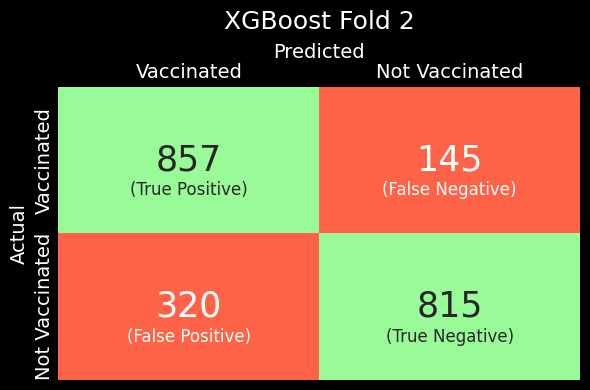



Classification Report:


              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1135
           1       0.73      0.86      0.79      1002

    accuracy                           0.78      2137
   macro avg       0.79      0.79      0.78      2137
weighted avg       0.79      0.78      0.78      2137



Sensitivity: 0.8553
Specificity: 0.7181
Log Loss: 7.84291007297121




<Figure size 700x700 with 0 Axes>

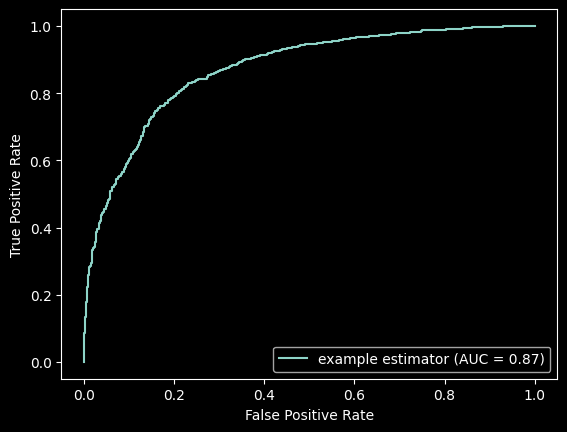

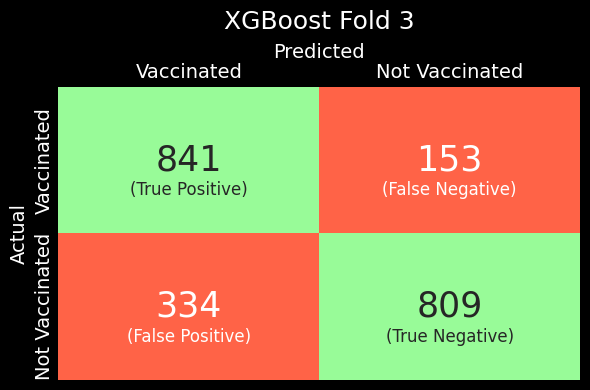



Classification Report:


              precision    recall  f1-score   support

           0       0.84      0.71      0.77      1143
           1       0.72      0.85      0.78       994

    accuracy                           0.77      2137
   macro avg       0.78      0.78      0.77      2137
weighted avg       0.78      0.77      0.77      2137



Sensitivity: 0.8461
Specificity: 0.7078
Log Loss: 8.213972485025764




<Figure size 700x700 with 0 Axes>

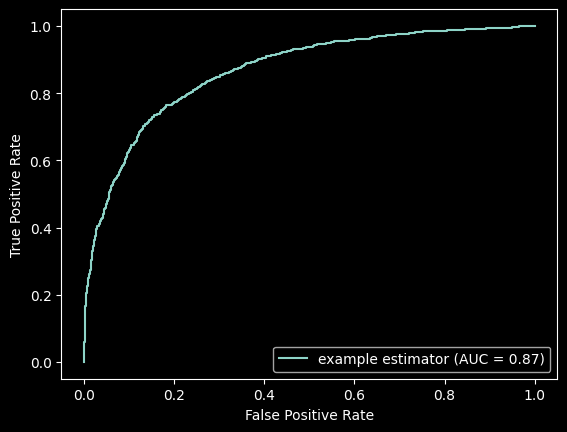

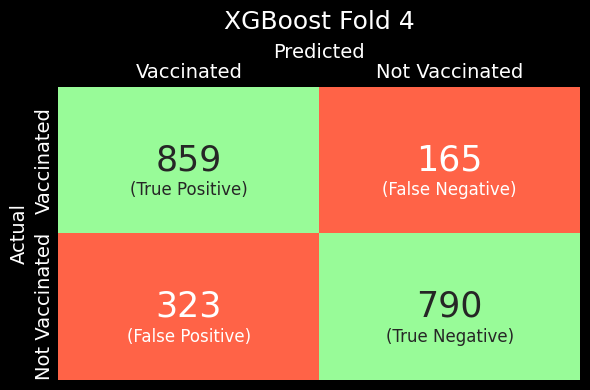



Classification Report:


              precision    recall  f1-score   support

           0       0.83      0.71      0.76      1113
           1       0.73      0.84      0.78      1024

    accuracy                           0.77      2137
   macro avg       0.78      0.77      0.77      2137
weighted avg       0.78      0.77      0.77      2137



Sensitivity: 0.8389
Specificity: 0.7098
Log Loss: 8.23083895830097




<Figure size 700x700 with 0 Axes>

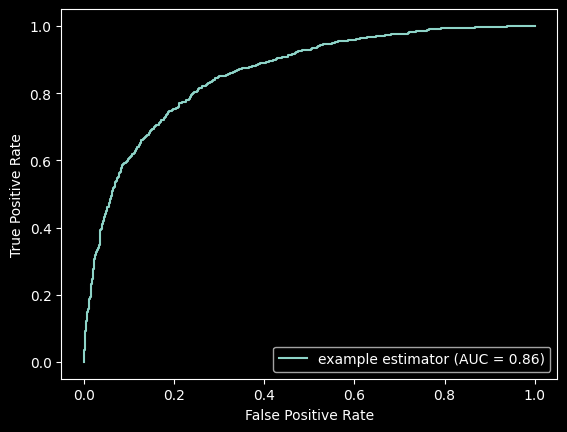

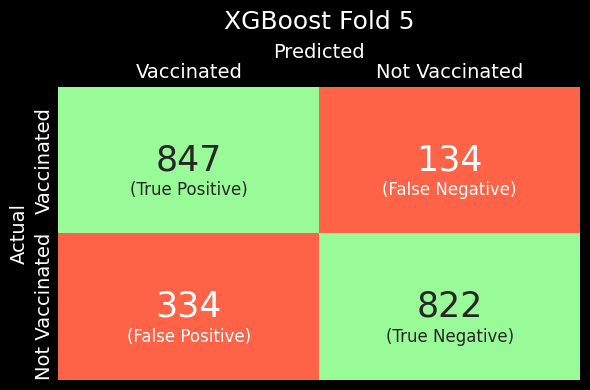



Classification Report:


              precision    recall  f1-score   support

           0       0.86      0.71      0.78      1156
           1       0.72      0.86      0.78       981

    accuracy                           0.78      2137
   macro avg       0.79      0.79      0.78      2137
weighted avg       0.79      0.78      0.78      2137



Sensitivity: 0.8634
Specificity: 0.7111
Log Loss: 7.89350949279683




<Figure size 700x700 with 0 Axes>

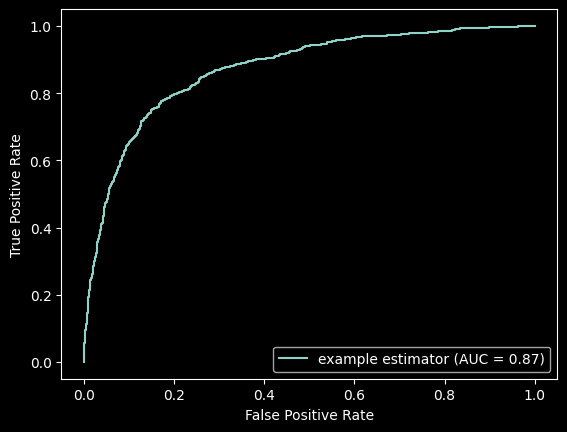

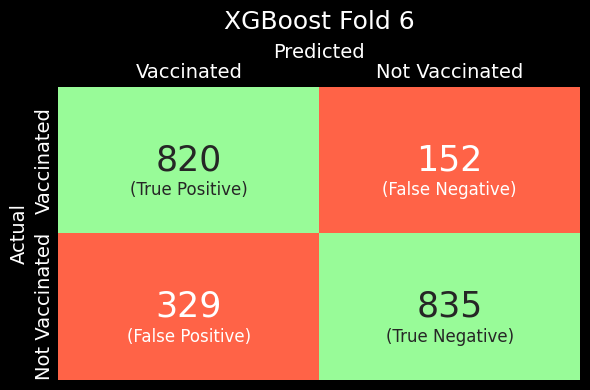



Classification Report:


              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1164
           1       0.71      0.84      0.77       972

    accuracy                           0.77      2136
   macro avg       0.78      0.78      0.77      2136
weighted avg       0.79      0.77      0.77      2136



Sensitivity: 0.8436
Specificity: 0.7174
Log Loss: 8.116571760377036




<Figure size 700x700 with 0 Axes>

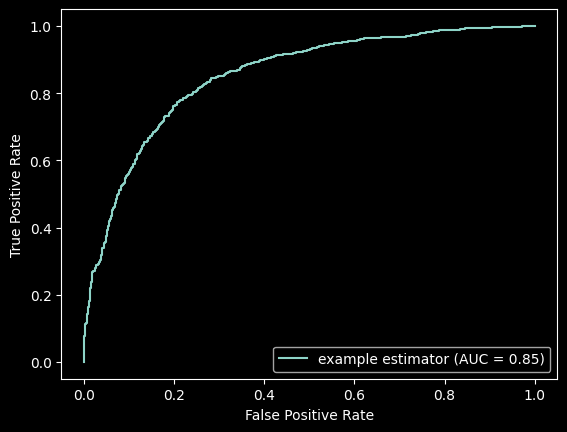

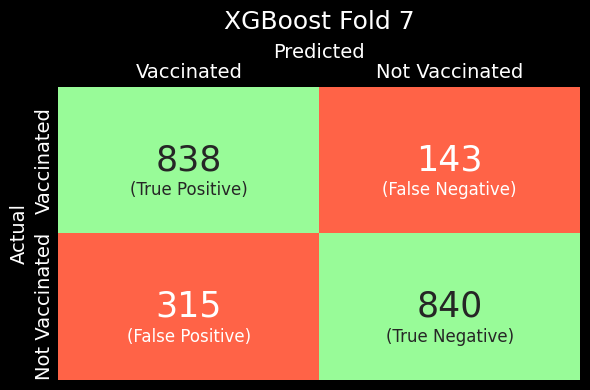



Classification Report:


              precision    recall  f1-score   support

           0       0.85      0.73      0.79      1155
           1       0.73      0.85      0.79       981

    accuracy                           0.79      2136
   macro avg       0.79      0.79      0.79      2136
weighted avg       0.80      0.79      0.79      2136



Sensitivity: 0.8542
Specificity: 0.7273
Log Loss: 7.728461260400588




<Figure size 700x700 with 0 Axes>

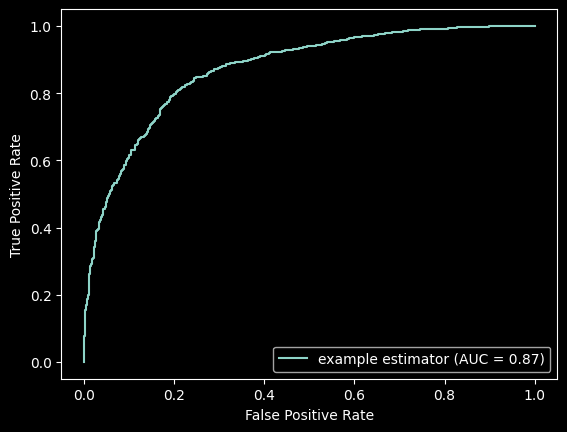

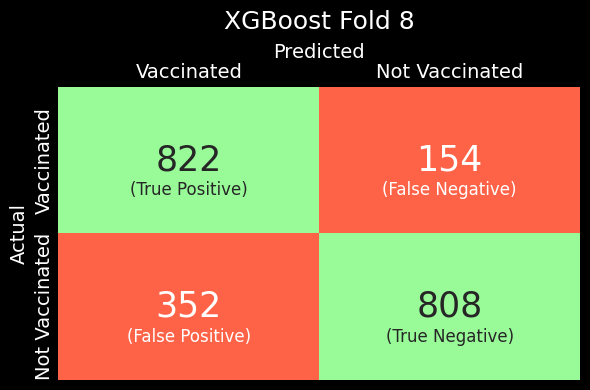



Classification Report:


              precision    recall  f1-score   support

           0       0.84      0.70      0.76      1160
           1       0.70      0.84      0.76       976

    accuracy                           0.76      2136
   macro avg       0.77      0.77      0.76      2136
weighted avg       0.78      0.76      0.76      2136



Sensitivity: 0.8422
Specificity: 0.6966
Log Loss: 8.538430999481871




<Figure size 700x700 with 0 Axes>

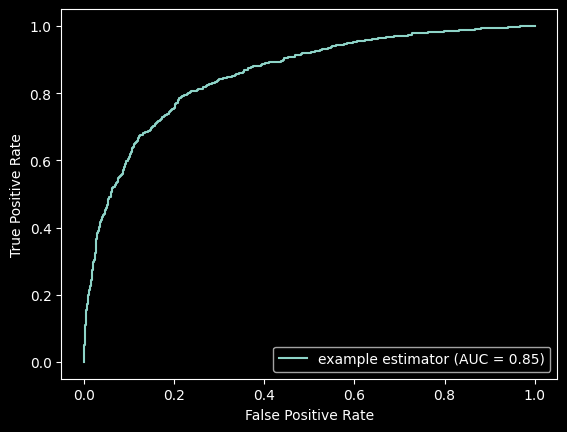

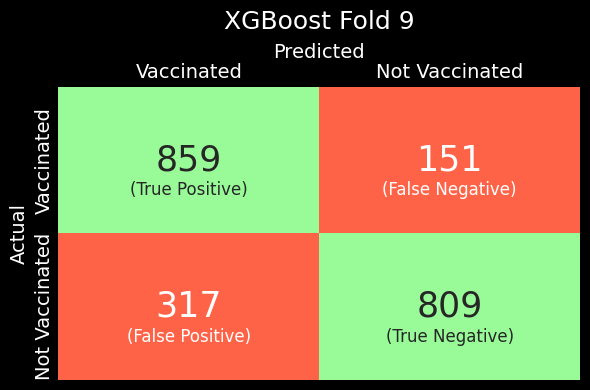



Classification Report:


              precision    recall  f1-score   support

           0       0.84      0.72      0.78      1126
           1       0.73      0.85      0.79      1010

    accuracy                           0.78      2136
   macro avg       0.79      0.78      0.78      2136
weighted avg       0.79      0.78      0.78      2136



Sensitivity: 0.8505
Specificity: 0.7185
Log Loss: 7.897204956042522




<Figure size 700x700 with 0 Axes>

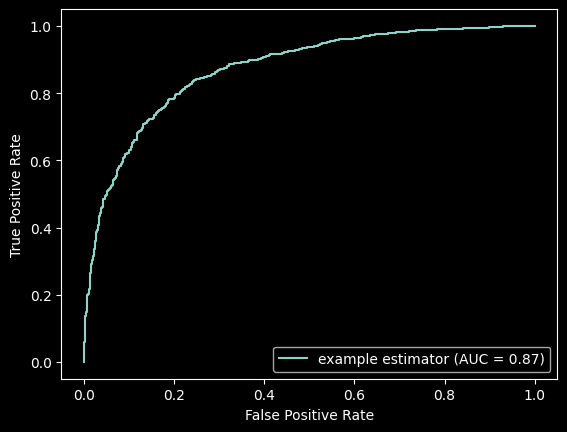

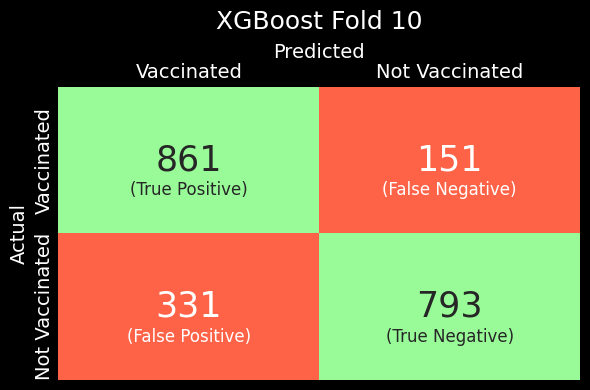



Classification Report:


              precision    recall  f1-score   support

           0       0.84      0.71      0.77      1124
           1       0.72      0.85      0.78      1012

    accuracy                           0.77      2136
   macro avg       0.78      0.78      0.77      2136
weighted avg       0.78      0.77      0.77      2136



Sensitivity: 0.8508
Specificity: 0.7055
Log Loss: 8.133446129941229




<Figure size 700x700 with 0 Axes>

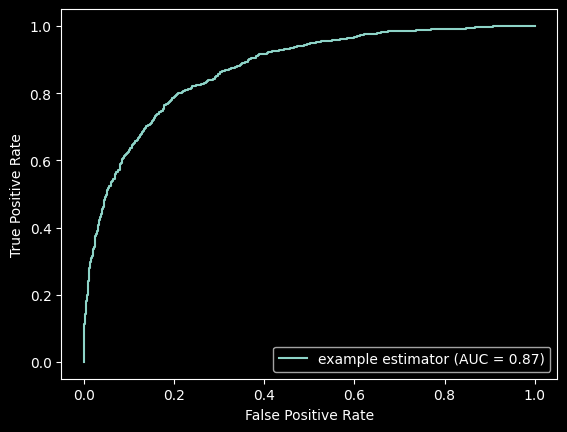

In [38]:

# Assuming you have your data 'X' (input features) and 'y' (target labels)

# Define the number of folds (K)
k = 10

# Initialize lists to store the evaluation metrics
confusion_matrices = []
accuracy_scores = []
truepositive = []
truenegative = []
falsepositive = []
falsenegative = []
specificity = []
sensitivity = []
LogLoss = []
auc = []
test = []
pred_proba = []

# Create the K-fold cross-validation object
kf = KFold(n_splits=k)


X1 = X_seasonal_train.values
y1 = y_seasonal_train.values

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X1):
    # Split the data into training and test sets
    X_train_lr, X_test_lr = X1[train_index], X1[test_index]
    y_train_lr, y_test_lr = y1[train_index], y1[test_index]

    # Train your model on the training set
    clf_seasonal.fit(X_train_lr, y_train_lr)

    # Make predictions on the test set
    y_pred = clf_seasonal.predict(X_test_lr)
    y_pred_proba = clf_seasonal.predict_proba(X_test_lr)


    # Compute the confusion matrix
    cm = confusion_matrix(y_test_lr, y_pred)
    confusion_matrices.append(np.flip(cm))

    tn, fp, fn, tp = cm.ravel()
    truenegative.append(tn)
    falsepositive.append(fp)
    falsenegative.append(fn)
    truepositive.append(tp)


    #Compute Specificity and Sensitivity
    Sensitivity = np.round(tp / (tp+fn),4)
    sensitivity.append(Sensitivity)
    Specificity = np.round(tn / (tn+fp),4)
    specificity.append(Specificity)


    #Compute the log loss
    logloss = log_loss(y_test_lr, y_pred, labels=[0, 1])
    LogLoss.append(logloss)

    # Compute the classification report
    accuracy = classification_report(y_test_lr, y_pred)
    accuracy_scores.append(accuracy)

    AUC = roc_auc_score(y_test_lr, y_pred_proba[:,1], average='macro')
    print(AUC)
    auc.append(AUC)

    pred_proba.append(y_pred_proba[:,1])
    test.append(y_test_lr)

# Print the confusion matrices and accuracy scores for each fold
for fold in range(k):
    confusion_matrix_plotting(confusion_matrices[fold], ("XGBoost " + f"Fold {fold+1}"))
    print("\n")
    print("Classification Report:")
    print("\n")
    print(accuracy_scores[fold])
    print("\n")
    print("Sensitivity: " + str(sensitivity[fold]))
    print("Specificity: " + str(specificity[fold]))
    print("Log Loss: " + str(LogLoss[fold]))
    print("\n")
    plot_roc_curve(test[fold],pred_proba[fold])
    print()

In [39]:
# Python program to get average of a list
def Average(lst):
    return sum(lst) / len(lst)

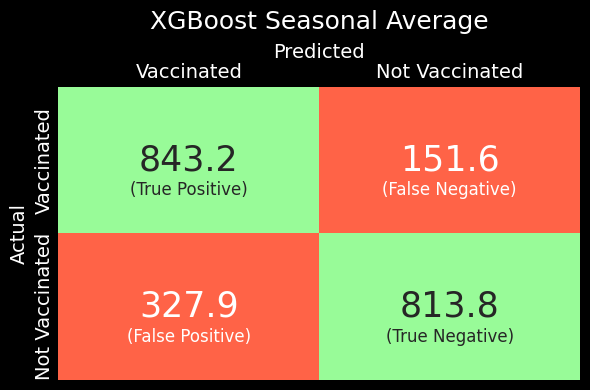

In [40]:
test = np.array([[Average(truepositive), Average(falsenegative)], [Average(falsepositive), Average(truenegative)]])
confusion_matrix_plotting(test, ("XGBoost Seasonal Average"))

In [41]:
print(Average(auc))

0.8644191291009381


In [42]:
clf_h1n1 = XGBClassifier(**study_h1n1.best_params, n_jobs=-1, random_state=42, verbose=0)

0.8693838254172015
0.8667518391279171
0.8596646966146141
0.8715361519277346
0.8804249258470422
0.8771461894888287
0.8795162509448223
0.8835289927801342
0.8694677127782566
0.8578028206142085


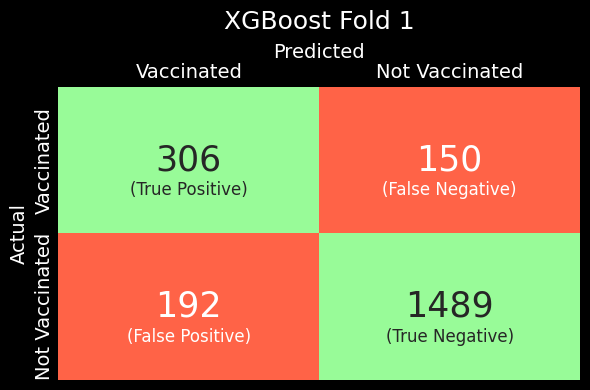



Classification Report:


              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1681
           1       0.61      0.67      0.64       456

    accuracy                           0.84      2137
   macro avg       0.76      0.78      0.77      2137
weighted avg       0.85      0.84      0.84      2137



Sensitivity: 0.6711
Specificity: 0.8858
Log Loss: 5.768333860120761




<Figure size 700x700 with 0 Axes>

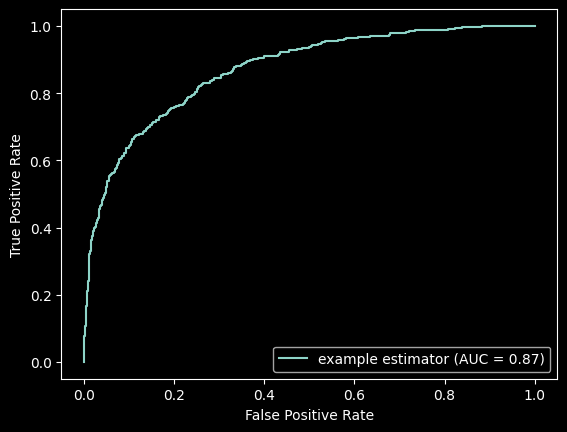

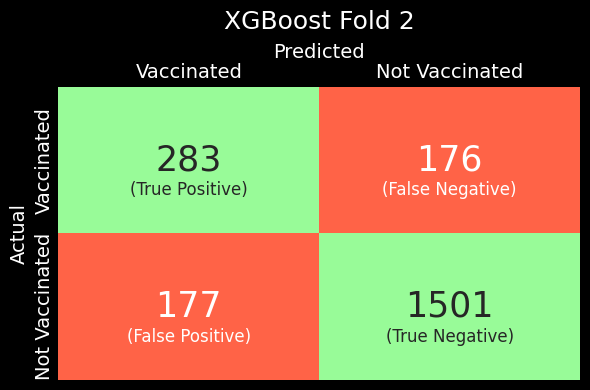



Classification Report:


              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1678
           1       0.62      0.62      0.62       459

    accuracy                           0.83      2137
   macro avg       0.76      0.76      0.76      2137
weighted avg       0.83      0.83      0.83      2137



Sensitivity: 0.6166
Specificity: 0.8945
Log Loss: 5.953865066148037




<Figure size 700x700 with 0 Axes>

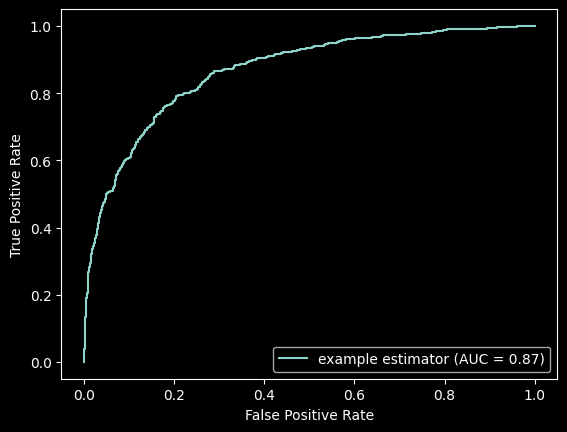

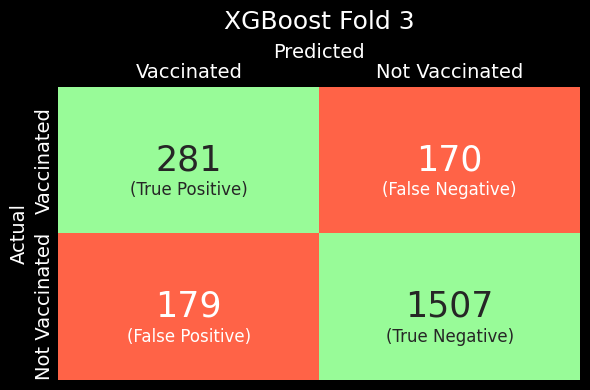



Classification Report:


              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1686
           1       0.61      0.62      0.62       451

    accuracy                           0.84      2137
   macro avg       0.75      0.76      0.76      2137
weighted avg       0.84      0.84      0.84      2137



Sensitivity: 0.6231
Specificity: 0.8938
Log Loss: 5.88639917304721




<Figure size 700x700 with 0 Axes>

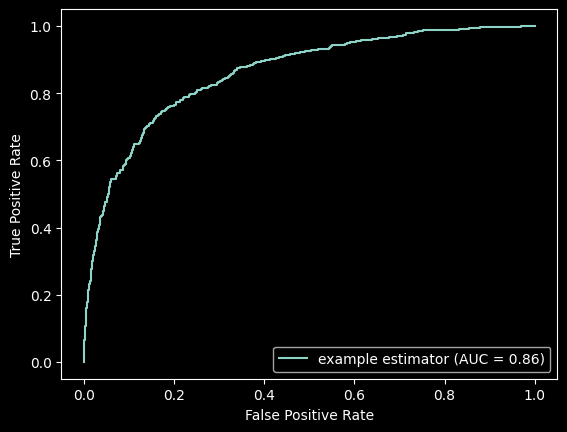

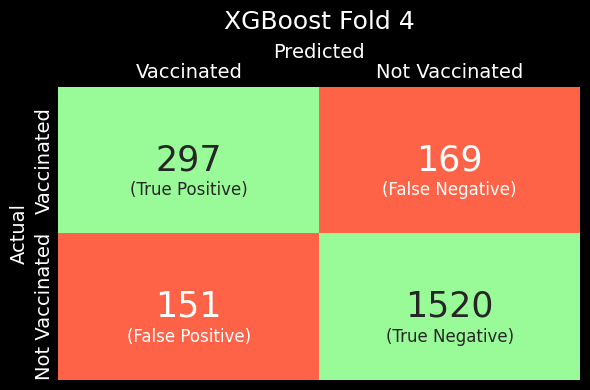



Classification Report:


              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1671
           1       0.66      0.64      0.65       466

    accuracy                           0.85      2137
   macro avg       0.78      0.77      0.78      2137
weighted avg       0.85      0.85      0.85      2137



Sensitivity: 0.6373
Specificity: 0.9096
Log Loss: 5.397271448066209




<Figure size 700x700 with 0 Axes>

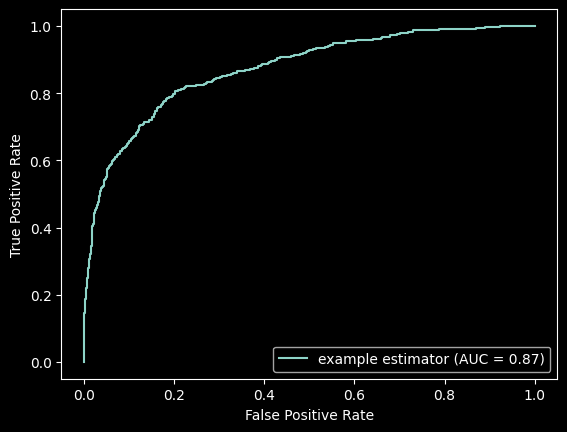

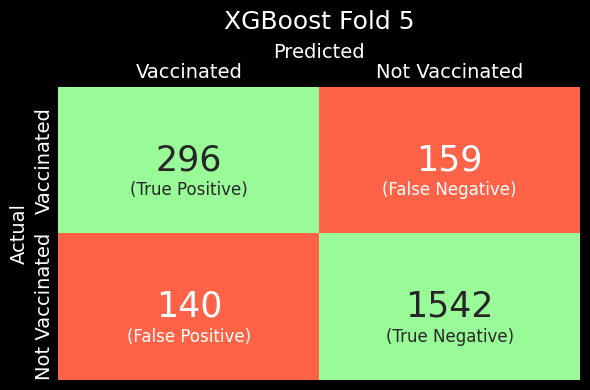



Classification Report:


              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1682
           1       0.68      0.65      0.66       455

    accuracy                           0.86      2137
   macro avg       0.79      0.78      0.79      2137
weighted avg       0.86      0.86      0.86      2137



Sensitivity: 0.6505
Specificity: 0.9168
Log Loss: 5.043075509286864




<Figure size 700x700 with 0 Axes>

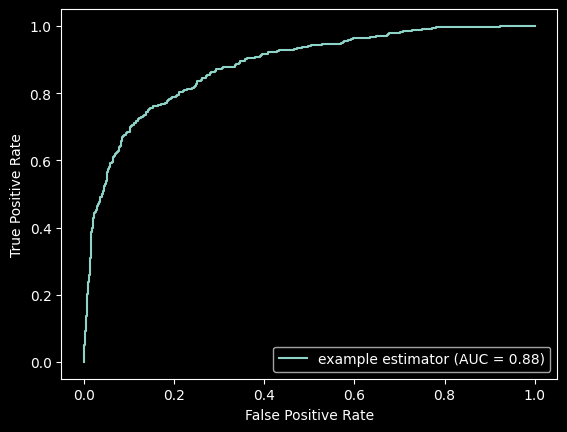

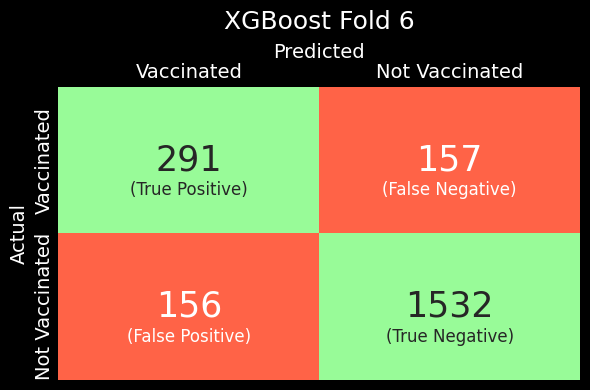



Classification Report:


              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1688
           1       0.65      0.65      0.65       448

    accuracy                           0.85      2136
   macro avg       0.78      0.78      0.78      2136
weighted avg       0.85      0.85      0.85      2136



Sensitivity: 0.6496
Specificity: 0.9076
Log Loss: 5.281677673592542




<Figure size 700x700 with 0 Axes>

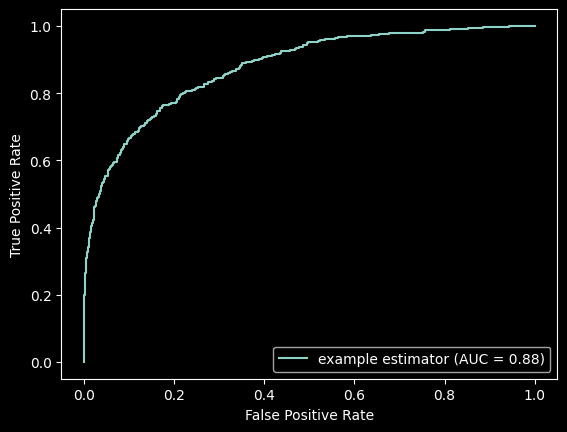

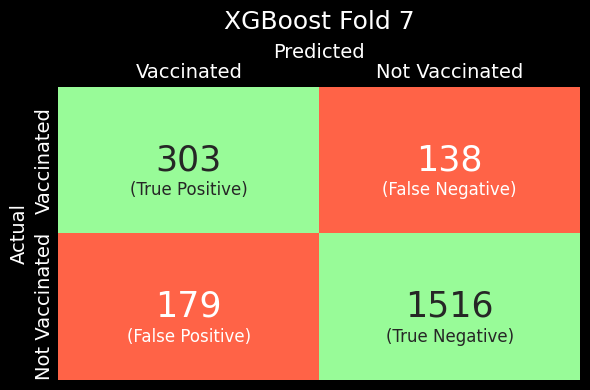



Classification Report:


              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1695
           1       0.63      0.69      0.66       441

    accuracy                           0.85      2136
   macro avg       0.77      0.79      0.78      2136
weighted avg       0.86      0.85      0.85      2136



Sensitivity: 0.6871
Specificity: 0.8944
Log Loss: 5.349175151849316




<Figure size 700x700 with 0 Axes>

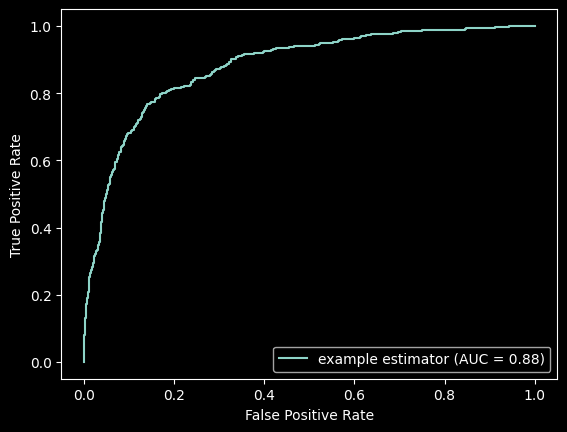

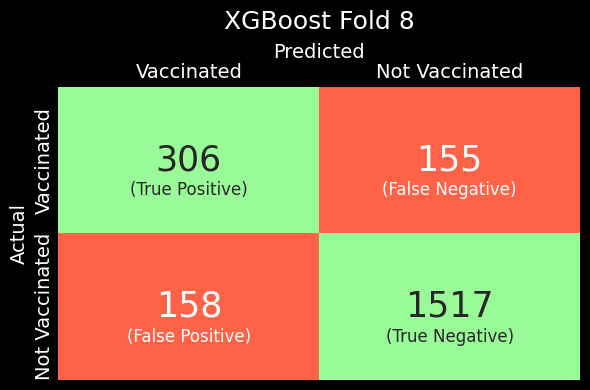



Classification Report:


              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1675
           1       0.66      0.66      0.66       461

    accuracy                           0.85      2136
   macro avg       0.78      0.78      0.78      2136
weighted avg       0.85      0.85      0.85      2136



Sensitivity: 0.6638
Specificity: 0.9057
Log Loss: 5.281677673592541




<Figure size 700x700 with 0 Axes>

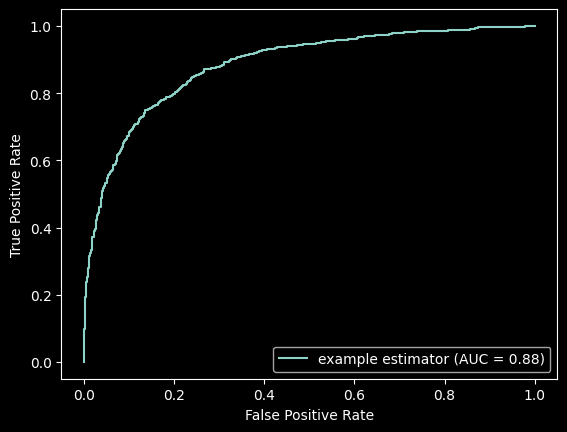

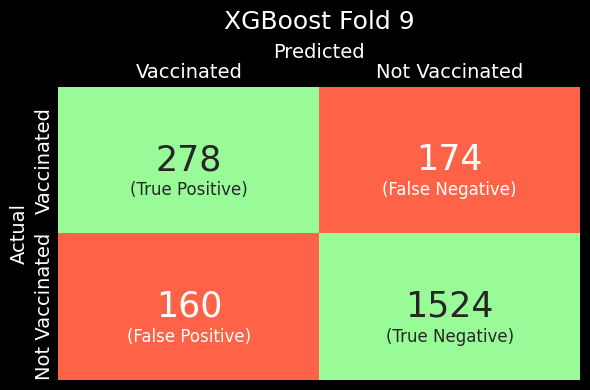



Classification Report:


              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1684
           1       0.63      0.62      0.62       452

    accuracy                           0.84      2136
   macro avg       0.77      0.76      0.76      2136
weighted avg       0.84      0.84      0.84      2136



Sensitivity: 0.615
Specificity: 0.905
Log Loss: 5.636039434440604




<Figure size 700x700 with 0 Axes>

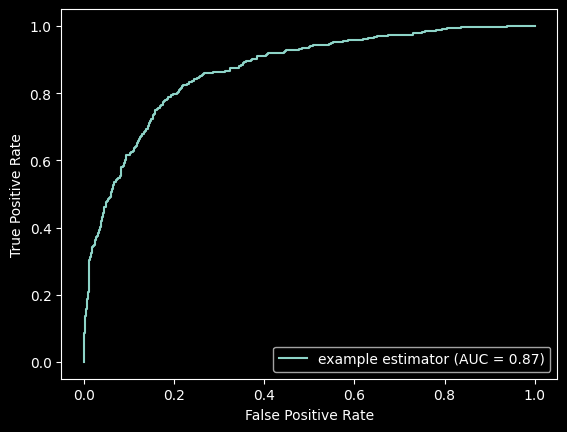

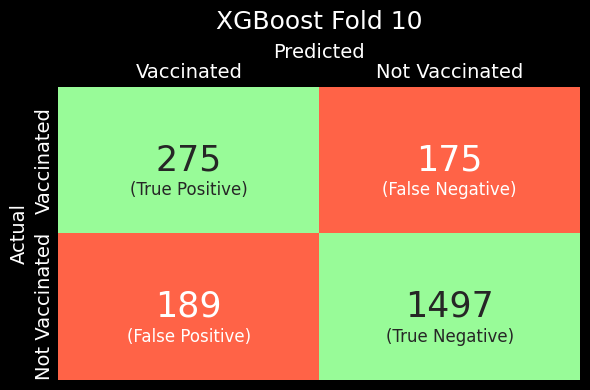



Classification Report:


              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1686
           1       0.59      0.61      0.60       450

    accuracy                           0.83      2136
   macro avg       0.74      0.75      0.75      2136
weighted avg       0.83      0.83      0.83      2136



Sensitivity: 0.6111
Specificity: 0.8879
Log Loss: 6.142270521366407




<Figure size 700x700 with 0 Axes>

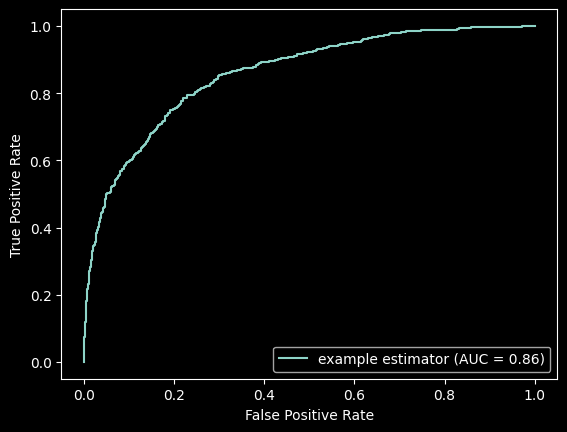

In [43]:

# Assuming you have your data 'X' (input features) and 'y' (target labels)

# Define the number of folds (K)
k = 10

# Initialize lists to store the evaluation metrics
confusion_matrices = []
accuracy_scores = []
truepositive = []
truenegative = []
falsepositive = []
falsenegative = []
specificity = []
sensitivity = []
LogLoss = []
auc = []
test = []
pred_proba = []

# Create the K-fold cross-validation object
kf = KFold(n_splits=k)


X1 = X_h1n1_train.values
y1 = y_h1n1_train.values

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X1):
    # Split the data into training and test sets
    X_train_lr, X_test_lr = X1[train_index], X1[test_index]
    y_train_lr, y_test_lr = y1[train_index], y1[test_index]

    # Train your model on the training set
    clf_h1n1.fit(X_train_lr, y_train_lr)

    # Make predictions on the test set
    y_pred = clf_h1n1.predict(X_test_lr)
    y_pred_proba = clf_h1n1.predict_proba(X_test_lr)


    # Compute the confusion matrix
    cm = confusion_matrix(y_test_lr, y_pred)
    confusion_matrices.append(np.flip(cm))

    tn, fp, fn, tp = cm.ravel()
    truenegative.append(tn)
    falsepositive.append(fp)
    falsenegative.append(fn)
    truepositive.append(tp)


    #Compute Specificity and Sensitivity
    Sensitivity = np.round(tp / (tp+fn),4)
    sensitivity.append(Sensitivity)
    Specificity = np.round(tn / (tn+fp),4)
    specificity.append(Specificity)


    #Compute the log loss
    logloss = log_loss(y_test_lr, y_pred, labels=[0, 1])
    LogLoss.append(logloss)

    # Compute the classification report
    accuracy = classification_report(y_test_lr, y_pred)
    accuracy_scores.append(accuracy)

    AUC = roc_auc_score(y_test_lr, y_pred_proba[:,1], average='macro')
    print(AUC)
    auc.append(AUC)

    pred_proba.append(y_pred_proba[:,1])
    test.append(y_test_lr)

# Print the confusion matrices and accuracy scores for each fold
for fold in range(k):
    confusion_matrix_plotting(confusion_matrices[fold], ("XGBoost " + f"Fold {fold+1}"))
    print("\n")
    print("Classification Report:")
    print("\n")
    print(accuracy_scores[fold])
    print("\n")
    print("Sensitivity: " + str(sensitivity[fold]))
    print("Specificity: " + str(specificity[fold]))
    print("Log Loss: " + str(LogLoss[fold]))
    print("\n")
    plot_roc_curve(test[fold],pred_proba[fold])
    print()

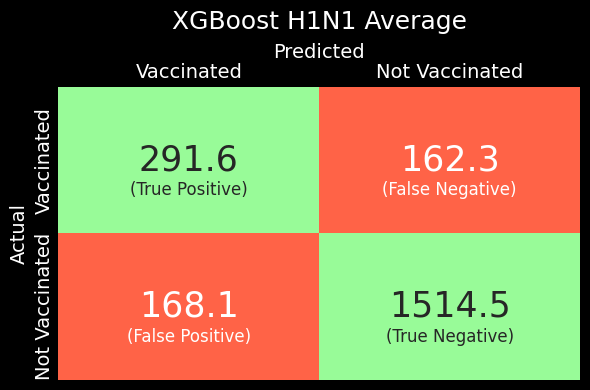

In [44]:
test_h1n1 = np.array([[Average(truepositive), Average(falsenegative)], [Average(falsepositive), Average(truenegative)]])
confusion_matrix_plotting(test_h1n1, ("XGBoost H1N1 Average"))

In [45]:
print(Average(auc))

0.871522340554076


In [46]:
a = X_seasonal_test

# transform the train by using the data cleaning stuff above to fill in missing data and create dummy variables
processed_data = preprocessor_seasonal.transform(a)

# Get the feature names for the transformed data
feature_names = preprocessor_seasonal.named_transformers_['cat']\
                    .named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numeric feature names with categorical feature names
all_feature_names = numeric_features + list(feature_names) + ordinal_features

# Convert the processed data array back into a DataFrame
X_seasonal_test = pd.DataFrame(processed_data, columns=all_feature_names)

X_seasonal_test["seasonal_vaccine_effectiveness"] = X_seasonal_test["opinion_seas_vacc_effective"]*X_seasonal_test["opinion_seas_sick_from_vacc"]
X_seasonal_test["seasonal_household"]=X_seasonal_test["household_children"]*X_seasonal_test["household_adults"]

X_seasonal_test = X_seasonal_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

X_seasonal_test = X_seasonal_test.loc[:,~X_seasonal_test.columns.duplicated()].copy()

In [47]:
clf_seasonal.fit(X_seasonal_train, y_seasonal_train)

XGBClassifier(alpha=2.07, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.54, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=27.0, learning_rate=0.075,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=450, n_jobs=-1, ...)

In [48]:
importances = (clf_seasonal.feature_importances_)/sum(clf_seasonal.feature_importances_)
importances

array([0.00431184, 0.0049609 , 0.00454461, 0.00401545, 0.00446965,
       0.00398521, 0.00482065, 0.00374256, 0.00499849, 0.00445055,
       0.00474725, 0.00353539, 0.00489947, 0.00979183, 0.0047688 ,
       0.        , 0.        , 0.02541913, 0.02142728, 0.00398453,
       0.00243376, 0.00774522, 0.00476079, 0.00419707, 0.        ,
       0.00382648, 0.        , 0.00649277, 0.0040705 , 0.00498515,
       0.00199359, 0.00492538, 0.0055607 , 0.00559489, 0.0058368 ,
       0.00422348, 0.00169776, 0.01944162, 0.02146558, 0.00322725,
       0.00319221, 0.00220479, 0.00443519, 0.0031144 , 0.0034753 ,
       0.00312983, 0.00422065, 0.        , 0.00613598, 0.00303567,
       0.0030647 , 0.00414446, 0.0053772 , 0.00307331, 0.008182  ,
       0.00748812, 0.00360609, 0.00360493, 0.01159044, 0.00526178,
       0.00554081, 0.00524076, 0.00890582, 0.0099316 , 0.00563401,
       0.01329571, 0.00536909, 0.00588804, 0.00587339, 0.01724983,
       0.00563758, 0.05798837, 0.00976399, 0.00693728, 0.00591

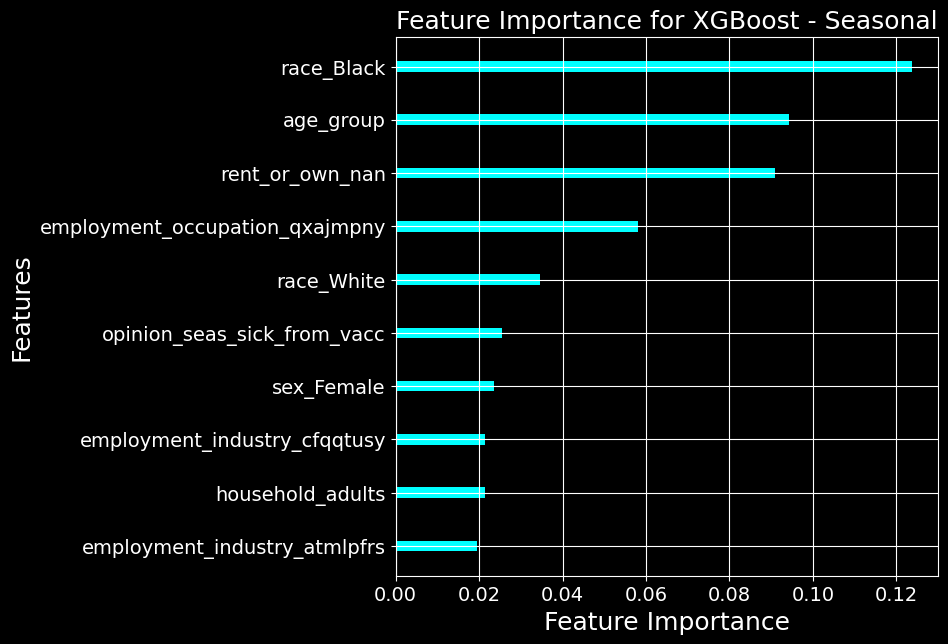

In [49]:
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(7,7))
plt.style.use('dark_background')
plt.barh(range(len(indices)), importances[indices], color="cyan", height=0.2, align='center')
plt.yticks(range(len(indices)), [X_seasonal_train.columns.values.tolist()[i] for i in indices], fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Feature Importance", fontsize=18)
plt.ylabel("Features", fontsize=18)
plt.title("Feature Importance for XGBoost - Seasonal", fontsize=18)
plt.grid()
plt.show()

In [50]:
y_seasonal_pred = clf_seasonal.predict(X_seasonal_test)

In [51]:
print(X_seasonal_test)

false_predictions = np.where(y_seasonal_pred != y_seasonal_test)[0]

# Print the indices of false predictions and their corresponding true and predicted labels
for idx in false_predictions:
    print(f"Index: {idx}, True label: {y_seasonal_test.to_list()[idx]}, Predicted label: {y_seasonal_pred[idx]}")

      h1n1_concern  h1n1_knowledge  behavioral_face_mask  \
0              1.0             0.0                   0.0   
1              0.0             0.0                   0.0   
2              0.0             0.0                   0.0   
3              0.0             1.0                   0.0   
4              1.0             0.0                   0.0   
...            ...             ...                   ...   
5337           0.0             0.0                   0.0   
5338           0.0             0.0                   0.0   
5339           0.0             0.0                   0.0   
5340           0.0             0.0                   0.0   
5341           0.0             0.0                   0.0   

      behavioral_wash_hands  behavioral_large_gatherings  \
0                       0.0                          0.0   
1                       0.0                          0.0   
2                       1.0                          0.0   
3                       0.0            

In [124]:
y_seasonal_test_new = y_seasonal_test.to_list()
data_seasonal = pd.concat([X_seasonal_test, pd.DataFrame(data={'Prediction': y_seasonal_pred, 'Actual': y_seasonal_test_new})], axis=1)
data_seasonal

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,Prediction,Actual
6879,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,Rent,Employed,atmpeygn,Non-MSA,1.0,0.0,fcxhlnwr,mxkfnird,NaN,NaN
15989,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,Rent,Employed,lrircsnp,"MSA, Not Principle City",3.0,3.0,wxleyezf,emcorrxb,NaN,NaN
7427,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,fpwskwrf,"MSA, Not Principle City",3.0,0.0,NaN,NaN,NaN,NaN
10129,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,NaN,NaN
23324,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Rent,Employed,atmpeygn,"MSA, Not Principle City",0.0,0.0,wxleyezf,emcorrxb,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
5336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
5337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
5339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [125]:
data_seasonal.iloc[:,[-2,-1]].to_csv("seasonalxgboost.csv", sep=",")

In [54]:
# False Negative
data_seasonal.query('Prediction==0 & Actual==1 ')

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,rent_or_own_Rent,rent_or_own_nan,age_group,education,income_poverty,employment_status,seasonal_vaccine_effectiveness,seasonal_household,Prediction,Actual
24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,2.0,4.0,0.0,0.0,0.0,0.0,0,1
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,4.0,1.0,2.0,2.0,1.0,0.0,0.0,0,1
54,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5.0,3.0,1.0,5.0,1.0,0.0,0.0,0.0,0,1
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.0,3.0,1.0,2.0,1.0,2.0,0.0,0.0,0,1
85,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,2.0,1.0,1.0,3.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,2.0,2.0,1.0,0.0,0.0,0.0,0,1
5297,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,1.0,0.0,2.0,0.0,0.0,0,1
5298,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,5.0,2.0,4.0,2.0,2.0,0.0,0.0,0,1
5299,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,1


In [55]:
# False Positive
data_seasonal.query('Prediction==1 & Actual==0 ')

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,rent_or_own_Rent,rent_or_own_nan,age_group,education,income_poverty,employment_status,seasonal_vaccine_effectiveness,seasonal_household,Prediction,Actual
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,5.0,4.0,2.0,3.0,3.0,0.0,0.0,1,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,5.0,2.0,2.0,3.0,0.0,0.0,0.0,1,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0
13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,4.0,2.0,1.0,1.0,0.0,0.0,1,0
18,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,4.0,4.0,1.0,2.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,5.0,2.0,1.0,1.0,3.0,0.0,0.0,1,0
5308,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,2.0,4.0,1.0,0.0,0.0,0.0,1,0
5311,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,1.0,2.0,1.0,0.0,0.0,0.0,1,0
5318,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,1,0


In [56]:
# True Positive
data_seasonal.query('Prediction==1 & Actual==1 ')

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,rent_or_own_Rent,rent_or_own_nan,age_group,education,income_poverty,employment_status,seasonal_vaccine_effectiveness,seasonal_household,Prediction,Actual
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,5.0,5.0,2.0,1.0,0.0,0.0,0.0,1,1
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,5.0,4.0,2.0,1.0,1.0,0.0,0.0,1,1
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0,1,1
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,2.0,1.0,1.0,0.0,0.0,0.0,1,1
11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,4.0,2.0,1.0,3.0,0.0,0.0,0.0,1,1
5337,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,5.0,4.0,1.0,1.0,0.0,0.0,0.0,1,1
5338,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,2.0,2.0,1.0,0.0,0.0,0.0,1,1
5339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,1,1


In [57]:
# True Negative
data_seasonal.query('Prediction==0 & Actual==0 ')

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,rent_or_own_Rent,rent_or_own_nan,age_group,education,income_poverty,employment_status,seasonal_vaccine_effectiveness,seasonal_household,Prediction,Actual
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,4.0,4.0,5.0,1.0,0.0,0.0,0.0,0,0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,4.0,5.0,5.0,1.0,1.0,0.0,0.0,0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,5.0,4.0,4.0,1.0,2.0,0.0,0.0,0,0
10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.0,4.0,2.0,4.0,1.0,0.0,0.0,0.0,0,0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5.0,4.0,4.0,4.0,2.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0,0
5331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5.0,4.0,4.0,5.0,0.0,3.0,0.0,0.0,0,0
5334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0,0
5336,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,2.0,4.0,2.0,0.0,0.0,0.0,0,0


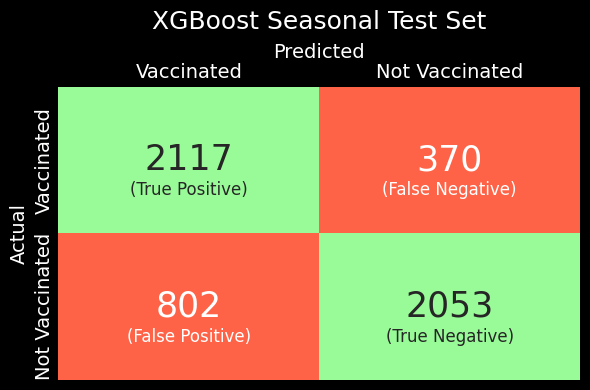

In [58]:
cm = confusion_matrix(y_seasonal_test, y_seasonal_pred)
confusion_matrix_plotting(np.flip(cm), "XGBoost Seasonal Test Set")

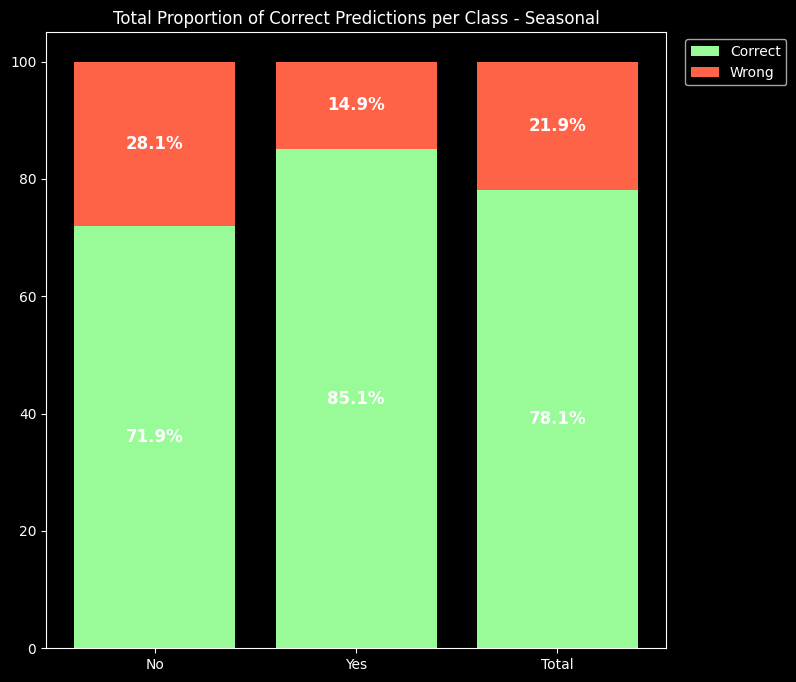

In [59]:
tn = cm[0][0]
fp = cm[0][1]

fn = cm[1][0]
tp = cm[1][1]

negative = tn + fp
positive = tp + fn

total = tn + fp + tp + fn

no_weights = []
no_weights.append((fp/negative)*100)
no_weights.append((fn/positive)*100)
no_weights.append(((fn+fp)/total)*100)

yes_weights = []
yes_weights.append((tn/negative)*100)
yes_weights.append((tp/positive)*100)
yes_weights.append(((tn+tp)/total)*100)


species = (
    "No",
    "Yes",
    "Total",
)
weight_counts = {
    "Correct": yes_weights,
    "Wrong": no_weights,

}

fig, ax = plt.subplots(1,1,figsize=(8,8))
bottom = np.zeros(3)

j = 0

colors = ['palegreen', 'tomato']

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, label=boolean, bottom=bottom, color=colors[j])

    for i, rect in enumerate(p):
        height = rect.get_height()
        if height >= 0:
            ax.text(rect.get_x() + rect.get_width() / 2,
                    bottom[i] + height / 2,
                    "{:.1f}%".format(height),
                    ha='center',
                    va='center',
                   fontsize=12,
                   weight="bold")

    bottom += weight_count
    j += 1

ax.set_title("Total Proportion of Correct Predictions per Class - Seasonal")
ax.legend(bbox_to_anchor=(1.02, 1))
ax.set_yticks(ticks=[0, 20, 40, 60, 80, 100])
plt.show()

In [60]:
sensitivity = np.round(tp / (tp+fn),4)
print("Sensitivity: " + str(sensitivity))

Sensitivity: 0.8512


In [61]:
specificity = np.round(tn / (tn+fp),4)
print("Specificity: " + str(specificity))

Specificity: 0.7191


In [62]:
print(classification_report(y_seasonal_test, y_seasonal_pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      2855
           1       0.73      0.85      0.78      2487

    accuracy                           0.78      5342
   macro avg       0.79      0.79      0.78      5342
weighted avg       0.79      0.78      0.78      5342



0.871752235970303


<Figure size 700x700 with 0 Axes>

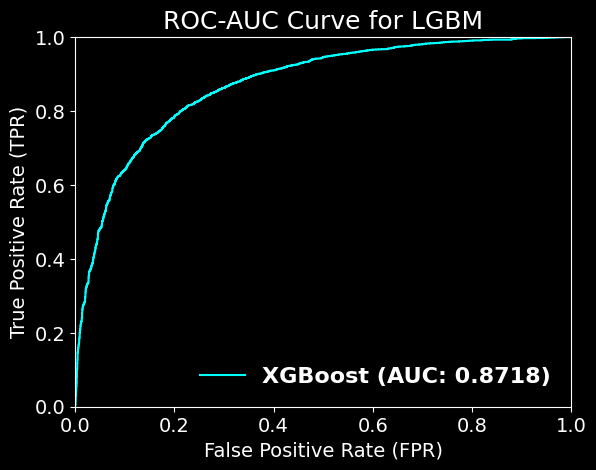

In [63]:
y_seasonal_pred_proba = clf_seasonal.predict_proba(X_seasonal_test)
plt.style.use('dark_background')
plt.figure(figsize=(7,7))
fpr1, tpr1, threshold1 = roc_curve(y_seasonal_test, y_seasonal_pred_proba[:,1])
roc_auc = metrics.auc(fpr1, tpr1)
print(roc_auc)
display = RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=np.round(roc_auc,4))
display.plot(color="cyan")
plt.grid(False)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.title("ROC-AUC Curve for LGBM", fontsize=18)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14)
legend_properties = {'size': 16, 'weight':'bold'}
plt.legend(loc=4, labels=['XGBoost (AUC: ' + str(np.round(roc_auc,4)) + ")"], prop=legend_properties, frameon=False)
plt.show()

In [80]:
a = X_h1n1_test

# transform the train by using the data cleaning stuff above to fill in missing data and create dummy variables
processed_data = preprocessor_h1n1.transform(a)

# Get the feature names for the transformed data
feature_names = preprocessor_h1n1.named_transformers_['cat']\
                    .named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numeric feature names with categorical feature names
all_feature_names = numeric_features + list(feature_names) + ordinal_features

# Convert the processed data array back into a DataFrame
X_h1n1_test = pd.DataFrame(processed_data, columns=all_feature_names)

X_h1n1_test["h1n1_flu"] = X_h1n1_test["h1n1_concern"]*X_h1n1_test["h1n1_knowledge"]
X_h1n1_test["h1n1_vaccine_effectiveness"] = X_h1n1_test["opinion_h1n1_vacc_effective"]*X_h1n1_test["opinion_h1n1_sick_from_vacc"]
X_h1n1_test["h1n1_chronic"] = X_h1n1_test["chronic_med_condition"]*X_h1n1_test["doctor_recc_h1n1"]

X_h1n1_test = X_h1n1_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

X_h1n1_test = X_h1n1_test.loc[:,~X_h1n1_test.columns.duplicated()].copy()

In [86]:
clf_h1n1.fit(X_h1n1_train, y_h1n1_train)

XGBClassifier(alpha=6.84, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.52, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=12.0,
              learning_rate=0.051000000000000004, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=700, n_jobs=-1, ...)

In [87]:
importances = (clf_h1n1.feature_importances_)/sum(clf_h1n1.feature_importances_)
importances

array([0.00452194, 0.00504371, 0.00569111, 0.00473542, 0.00405945,
       0.00388135, 0.00642097, 0.00516801, 0.00353485, 0.00408567,
       0.0039885 , 0.00365301, 0.00447252, 0.0078959 , 0.00587015,
       0.00768923, 0.        , 0.02085412, 0.02195525, 0.00531783,
       0.        , 0.00307276, 0.        , 0.00170497, 0.        ,
       0.0108307 , 0.        , 0.00583817, 0.        , 0.00448067,
       0.        , 0.00554978, 0.00451375, 0.0049987 , 0.00485056,
       0.0038285 , 0.00764242, 0.01954887, 0.02395244, 0.00521198,
       0.00363543, 0.00221248, 0.00504864, 0.00512254, 0.00272713,
       0.00681886, 0.00402727, 0.        , 0.00288227, 0.        ,
       0.00389394, 0.        , 0.00335973, 0.        , 0.00920729,
       0.00265354, 0.00390469, 0.00162433, 0.00524842, 0.00518286,
       0.00724649, 0.01626205, 0.00972738, 0.00537374, 0.00461789,
       0.00660303, 0.00675346, 0.00722418, 0.00462781, 0.0047698 ,
       0.01373185, 0.00802031, 0.00612179, 0.00537809, 0.00558

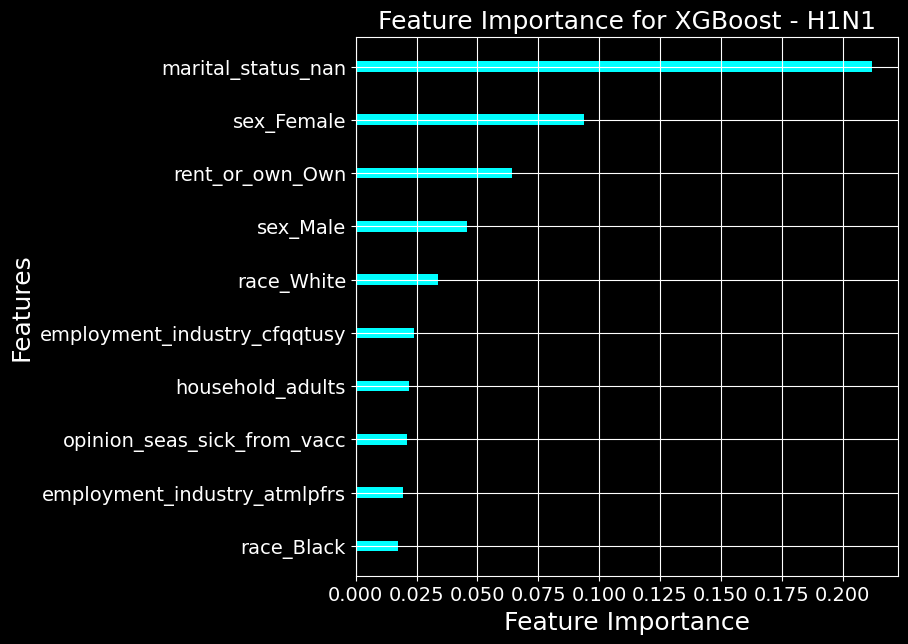

In [88]:
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(7,7))
plt.style.use('dark_background')
plt.barh(range(len(indices)), importances[indices], color="cyan", height=0.2, align='center')
plt.yticks(range(len(indices)), [X_h1n1_train.columns.values.tolist()[i] for i in indices], fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Feature Importance", fontsize=18)
plt.ylabel("Features", fontsize=18)
plt.title("Feature Importance for XGBoost - H1N1", fontsize=18)
plt.grid()
plt.show()

In [89]:
y_h1n1_pred = clf_h1n1.predict(X_h1n1_test)

In [90]:
print(X_h1n1_test)

false_predictions = np.where(y_h1n1_pred != y_h1n1_test)[0]

# Print the indices of false predictions and their corresponding true and predicted labels
for idx in false_predictions:
    print(f"Index: {idx}, True label: {y_h1n1_test.to_list()[idx]}, Predicted label: {y_h1n1_pred[idx]}")

      h1n1_concern  h1n1_knowledge  behavioral_face_mask  \
0              0.0             0.0                   0.0   
1              0.0             1.0                   0.0   
2              0.0             0.0                   0.0   
3              0.0             0.0                   0.0   
4              0.0             0.0                   0.0   
...            ...             ...                   ...   
5337           0.0             0.0                   0.0   
5338           0.0             1.0                   0.0   
5339           0.0             0.0                   0.0   
5340           0.0             0.0                   0.0   
5341           0.0             0.0                   0.0   

      behavioral_wash_hands  behavioral_large_gatherings  \
0                       0.0                          1.0   
1                       0.0                          0.0   
2                       0.0                          0.0   
3                       0.0            

In [122]:
y_h1n1_test_new = y_h1n1_test.to_list()
data_h1n1 = pd.concat([X_h1n1_test, pd.DataFrame(data={'Prediction': y_h1n1_pred, 'Actual': y_h1n1_test_new})], axis=1)
data_h1n1

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,rent_or_own_nan,age_group,education,income_poverty,employment_status,h1n1_flu,h1n1_vaccine_effectiveness,h1n1_chronic,Prediction,Actual
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,4.0,1.0,2.0,1.0,0.0,0.0,0.0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,1,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0
5338,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0,0
5339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,5.0,4.0,1.0,2.0,1.0,0.0,0.0,0.0,0,1
5340,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0,0


In [123]:
data_h1n1.iloc[:,[-2,-1]].to_csv("h1n1xgboost.csv", sep=",")

In [93]:
# False Negative
data_h1n1.query('Prediction==0 & Actual==1 ')

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,rent_or_own_nan,age_group,education,income_poverty,employment_status,h1n1_flu,h1n1_vaccine_effectiveness,h1n1_chronic,Prediction,Actual
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,1
45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0,1
56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,0,1
73,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0,1
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,5.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5247,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,1
5255,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0,1
5284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,5.0,5.0,5.0,0.0,1.0,0.0,0.0,0.0,0,1
5307,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0,1


In [94]:
# False Positive
data_h1n1.query('Prediction==1 & Actual==0 ')

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,rent_or_own_nan,age_group,education,income_poverty,employment_status,h1n1_flu,h1n1_vaccine_effectiveness,h1n1_chronic,Prediction,Actual
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,1,0
14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,1,0
21,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,1,0
27,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1,0
39,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5264,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0
5273,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,1,0
5286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0
5309,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,1,0


In [95]:
# True Positive
data_h1n1.query('Prediction==1 & Actual==1 ')

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,rent_or_own_nan,age_group,education,income_poverty,employment_status,h1n1_flu,h1n1_vaccine_effectiveness,h1n1_chronic,Prediction,Actual
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,1,1
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.0,3.0,NaN,0.0,0.0,0.0,0.0,0.0,1,1
19,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1,1
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,1,1
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,5.0,4.0,4.0,1.0,2.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5308,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1,1
5315,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,1.0,1.0,2.0,0.0,0.0,0.0,1,1
5317,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1,1
5320,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,1,1


In [96]:
# True Negative
data_h1n1.query('Prediction==0 & Actual==0 ')

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,...,rent_or_own_nan,age_group,education,income_poverty,employment_status,h1n1_flu,h1n1_vaccine_effectiveness,h1n1_chronic,Prediction,Actual
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,4.0,1.0,2.0,1.0,0.0,0.0,0.0,0,0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0,0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,1.0,2.0,1.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5336,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0,0
5337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0
5338,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0,0
5340,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0,0


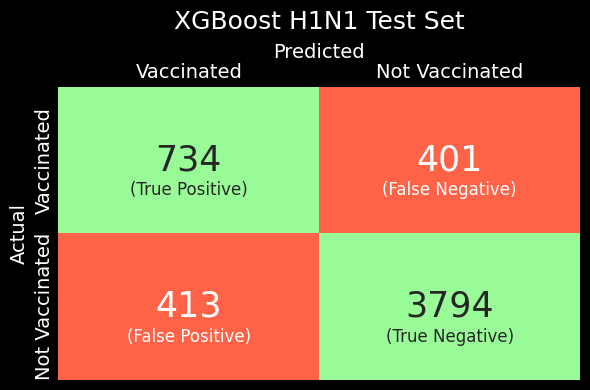

In [97]:
cm_h1n1 = confusion_matrix(y_h1n1_test, y_h1n1_pred)
confusion_matrix_plotting(np.flip(cm_h1n1), "XGBoost H1N1 Test Set")

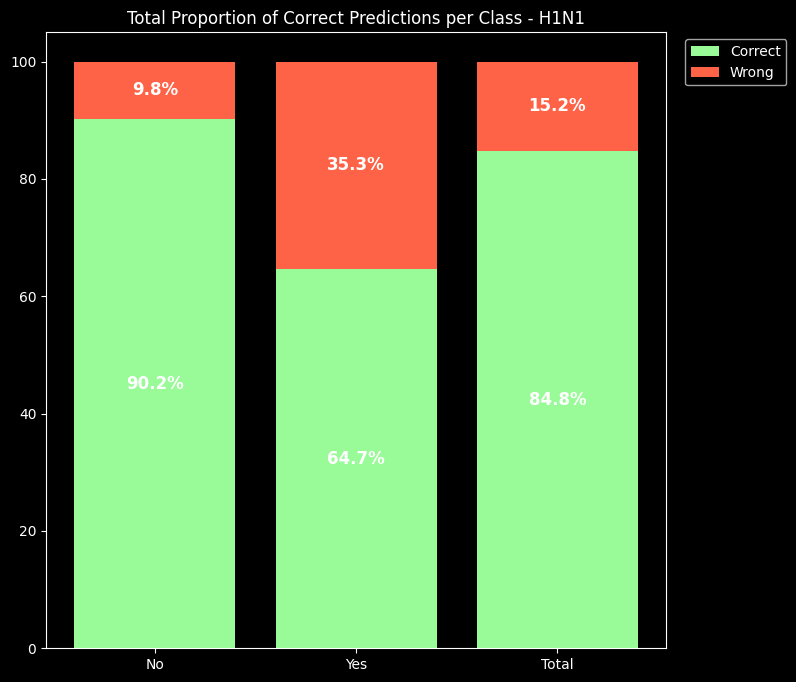

In [98]:
tn = cm_h1n1[0][0]
fp = cm_h1n1[0][1]

fn = cm_h1n1[1][0]
tp = cm_h1n1[1][1]

negative = tn + fp
positive = tp + fn

total = tn + fp + tp + fn

no_weights = []
no_weights.append((fp/negative)*100)
no_weights.append((fn/positive)*100)
no_weights.append(((fn+fp)/total)*100)

yes_weights = []
yes_weights.append((tn/negative)*100)
yes_weights.append((tp/positive)*100)
yes_weights.append(((tn+tp)/total)*100)


species = (
    "No",
    "Yes",
    "Total",
)
weight_counts = {
    "Correct": yes_weights,
    "Wrong": no_weights,

}

fig, ax = plt.subplots(1,1,figsize=(8,8))
bottom = np.zeros(3)

j = 0

colors = ['palegreen', 'tomato']

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, label=boolean, bottom=bottom, color=colors[j])

    for i, rect in enumerate(p):
        height = rect.get_height()
        if height >= 0:
            ax.text(rect.get_x() + rect.get_width() / 2,
                    bottom[i] + height / 2,
                    "{:.1f}%".format(height),
                    ha='center',
                    va='center',
                   fontsize=12,
                   weight="bold")

    bottom += weight_count
    j += 1

ax.set_title("Total Proportion of Correct Predictions per Class - H1N1")
ax.legend(bbox_to_anchor=(1.02, 1))
ax.set_yticks(ticks=[0, 20, 40, 60, 80, 100])
plt.show()

In [99]:
sensitivity = np.round(tp / (tp+fn),4)
print("Sensitivity: " + str(sensitivity))

Sensitivity: 0.6467


In [100]:
specificity = np.round(tn / (tn+fp),4)
print("Specificity: " + str(specificity))

Specificity: 0.9018


In [101]:
print(classification_report(y_h1n1_test, y_h1n1_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4207
           1       0.64      0.65      0.64      1135

    accuracy                           0.85      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.85      0.85      0.85      5342



0.8675632913049262


<Figure size 700x700 with 0 Axes>

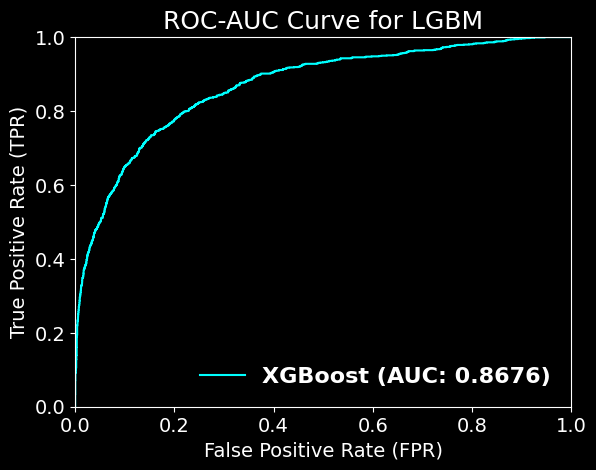

In [102]:
y_h1n1_pred_proba = clf_h1n1.predict_proba(X_h1n1_test)
plt.style.use('dark_background')
plt.figure(figsize=(7,7))
fpr1, tpr1, threshold1 = roc_curve(y_h1n1_test, y_h1n1_pred_proba[:,1])
roc_auc = metrics.auc(fpr1, tpr1)
print(roc_auc)
display = RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=np.round(roc_auc,4))
display.plot(color="cyan")
plt.grid(False)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.title("ROC-AUC Curve for LGBM", fontsize=18)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=14)
legend_properties = {'size': 16, 'weight':'bold'}
plt.legend(loc=4, labels=['XGBoost (AUC: ' + str(np.round(roc_auc,4)) + ")"], prop=legend_properties, frameon=False)
plt.show()

In [103]:
a = X_seasonal
b = y_seasonal

# transform the train by using the data cleaning stuff above to fill in missing data and create dummy variables
processed_data = preprocessor_seasonal.fit_transform(a, b)

# Get the feature names for the transformed data
feature_names = preprocessor_seasonal.named_transformers_['cat']\
                    .named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numeric feature names with categorical feature names
all_feature_names = numeric_features + list(feature_names) + ordinal_features

# Convert the processed data array back into a DataFrame
X_seasonal = pd.DataFrame(processed_data, columns=all_feature_names)

X_seasonal["seasonal_vaccine_effectiveness"] = X_seasonal["opinion_seas_vacc_effective"]*X_seasonal["opinion_seas_sick_from_vacc"]
X_seasonal["seasonal_household"]=X_seasonal["household_children"]*X_seasonal["household_adults"]

X_seasonal = X_seasonal.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

X_seasonal = X_seasonal.loc[:,~X_seasonal.columns.duplicated()].copy()

In [104]:
a = X_h1n1
b = y_h1n1

# transform the train by using the data cleaning stuff above to fill in missing data and create dummy variables
processed_data = preprocessor_h1n1.fit_transform(a)

# Get the feature names for the transformed data
feature_names = preprocessor_h1n1.named_transformers_['cat']\
                    .named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numeric feature names with categorical feature names
all_feature_names = numeric_features + list(feature_names) + ordinal_features

# Convert the processed data array back into a DataFrame
X_h1n1 = pd.DataFrame(processed_data, columns=all_feature_names)

X_h1n1["h1n1_flu"] = X_h1n1["h1n1_concern"]*X_h1n1["h1n1_knowledge"]
X_h1n1["h1n1_vaccine_effectiveness"] = X_h1n1["opinion_h1n1_vacc_effective"]*X_h1n1["opinion_h1n1_sick_from_vacc"]
X_h1n1["h1n1_chronic"] = X_h1n1["chronic_med_condition"]*X_h1n1["doctor_recc_h1n1"]

X_h1n1 = X_h1n1.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

X_h1n1 = X_h1n1.loc[:,~X_h1n1.columns.duplicated()].copy()

In [105]:
clf_seasonal.fit(X_seasonal, y_seasonal)

XGBClassifier(alpha=2.07, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.54, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=27.0, learning_rate=0.075,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=450, n_jobs=-1, ...)

In [106]:
clf_seasonal.feature_importances_

array([0.00459645, 0.00459884, 0.00455746, 0.00392668, 0.00556033,
       0.0048985 , 0.00390691, 0.0036689 , 0.00429691, 0.00393526,
       0.00438018, 0.00341636, 0.00563269, 0.00919533, 0.00387158,
       0.00208978, 0.0021361 , 0.02316987, 0.02118742, 0.0039351 ,
       0.00157701, 0.00912286, 0.00483386, 0.0030537 , 0.        ,
       0.00354603, 0.        , 0.00716995, 0.00547374, 0.00555991,
       0.00255841, 0.00433132, 0.00459949, 0.00650957, 0.00493873,
       0.00449665, 0.00429105, 0.01602015, 0.02598499, 0.00307992,
       0.00343412, 0.00455405, 0.00574377, 0.00172911, 0.00397327,
       0.00377665, 0.00425834, 0.        , 0.00717946, 0.00230291,
       0.00039024, 0.00439017, 0.00733609, 0.00317308, 0.00598191,
       0.00329231, 0.00289529, 0.00227642, 0.00984627, 0.00496047,
       0.00661713, 0.00497719, 0.00949201, 0.00962285, 0.00599872,
       0.0092169 , 0.00492397, 0.00499454, 0.00599246, 0.01882254,
       0.00559414, 0.0607615 , 0.01173251, 0.0077615 , 0.00664

In [107]:
clf_h1n1.fit(X_h1n1, y_h1n1)

XGBClassifier(alpha=6.84, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.52, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=12.0,
              learning_rate=0.051000000000000004, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=700, n_jobs=-1, ...)

In [108]:
clf_h1n1.feature_importances_

array([0.00413608, 0.00546374, 0.00477581, 0.00462717, 0.00362478,
       0.00340042, 0.00543111, 0.00480963, 0.00376679, 0.0043267 ,
       0.00386653, 0.00386605, 0.00422697, 0.00853998, 0.00729177,
       0.00372591, 0.        , 0.02518065, 0.02505537, 0.00362207,
       0.00302261, 0.00321379, 0.        , 0.00244754, 0.        ,
       0.0064133 , 0.        , 0.00327185, 0.00175485, 0.00276175,
       0.00737495, 0.00529102, 0.00401684, 0.00413095, 0.00354793,
       0.00269568, 0.00561277, 0.0180848 , 0.02478475, 0.00532505,
       0.00303333, 0.00879754, 0.0045003 , 0.00474213, 0.00321923,
       0.00526425, 0.00524509, 0.        , 0.00288248, 0.00106051,
       0.0044308 , 0.00235719, 0.0039802 , 0.00220773, 0.00746504,
       0.00466967, 0.0034416 , 0.00274512, 0.00595713, 0.00543058,
       0.00468207, 0.01070879, 0.010151  , 0.0054951 , 0.00416198,
       0.00667923, 0.00704507, 0.00601775, 0.00350642, 0.00484835,
       0.01065817, 0.00829735, 0.00655463, 0.00536264, 0.00539

In [109]:
test = pd.read_csv("test_set_features.csv")

In [110]:
test.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [111]:
test.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26708.000000,26623.000000,26586.000000,26629.000000,26495.000000,26689.000000,26668.000000,26636.000000,26626.000000,26580.000000,...,25919.000000,14480.000000,26310.000000,26328.000000,26333.000000,26256.000000,26209.000000,26187.000000,26483.000000,26483.000000
mean,40060.500000,1.623145,1.266042,0.049645,0.729798,0.069279,0.826084,0.351517,0.337227,0.683747,...,0.111501,0.887914,3.844622,2.326838,2.360612,4.024832,2.708688,2.143392,0.894310,0.543745
std,7710.079831,0.902755,0.615617,0.217215,0.444072,0.253934,0.379045,0.477453,0.472772,0.465022,...,0.314758,0.315483,1.007570,1.275636,1.359413,1.083204,1.376045,1.339102,0.754244,0.935057
min,26707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,33383.750000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,40060.500000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,46737.250000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,53414.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [112]:
test.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [113]:
# here apply the same data cleaning process to the test data set
a = test.drop(columns=['respondent_id'], axis=1)

processed_data = preprocessor_seasonal.transform(a)

# Get the feature names for the transformed data
feature_names = preprocessor_seasonal.named_transformers_['cat']\
                    .named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numeric feature names with categorical feature names
all_feature_names = numeric_features + list(feature_names) + ordinal_features

# Convert the processed data array back into a DataFrame
processed_df_seasonal  = pd.DataFrame(processed_data, columns=all_feature_names)

processed_df_seasonal["seasonal_vaccine_effectiveness"] = processed_df_seasonal["opinion_seas_vacc_effective"]*processed_df_seasonal["opinion_seas_sick_from_vacc"]
processed_df_seasonal["seasonal_household"]=processed_df_seasonal["household_children"]*processed_df_seasonal["household_adults"]

processed_df_seasonal = processed_df_seasonal.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

processed_df_seasonal = processed_df_seasonal.loc[:,~processed_df_seasonal.columns.duplicated()].copy()

In [114]:
prediction_seasonal = clf_seasonal.predict_proba(processed_df_seasonal)

In [115]:
# here apply the same data cleaning process to the test data set
a = test.drop(columns=['respondent_id'], axis=1)

processed_data = preprocessor_h1n1.transform(a)

# Get the feature names for the transformed data
feature_names = preprocessor_h1n1.named_transformers_['cat']\
                    .named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numeric feature names with categorical feature names
all_feature_names = numeric_features + list(feature_names) + ordinal_features

# Convert the processed data array back into a DataFrame
processed_df_h1n1  = pd.DataFrame(processed_data, columns=all_feature_names)

processed_df_h1n1["h1n1_flu"] = processed_df_h1n1["h1n1_concern"]*processed_df_h1n1["h1n1_knowledge"]
processed_df_h1n1["h1n1_vaccine_effectiveness"] = processed_df_h1n1["opinion_h1n1_vacc_effective"]*processed_df_h1n1["opinion_h1n1_sick_from_vacc"]
processed_df_h1n1["h1n1_chronic"] = processed_df_h1n1["chronic_med_condition"]*processed_df_h1n1["doctor_recc_h1n1"]

processed_df_h1n1 = processed_df_h1n1.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

processed_df_h1n1 = processed_df_h1n1.loc[:,~processed_df_h1n1.columns.duplicated()].copy()

In [116]:
prediction_h1n1 = clf_h1n1.predict_proba(processed_df_h1n1)

In [117]:
d = {'respondent_id': test['respondent_id']}

In [118]:
df = pd.DataFrame(data=d)

In [119]:
df['h1n1_vaccine'] = prediction_h1n1[:,1]

In [120]:
df['seasonal_vaccine'] = prediction_seasonal[:,1]

In [121]:
df.to_csv('xgboost.csv', sep=",", index=False)